# Example of Data Wrangling

For this example I took a random dataset from kaggle.com.

In [1]:
#Libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the dataset
df = pd.read_csv(r'C:\Users\ernes\projects\pollution\archive\AIR QUALITY INDEX- top countries.csv')

## Overlook

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            118 non-null    int64  
 1   Country/Region  118 non-null    object 
 2   2021            118 non-null    float64
 3   2020            118 non-null    object 
 4   2019            118 non-null    object 
 5   2018            118 non-null    object 
 6   Population      118 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.6+ KB


In [4]:
df.head()

,Rank,Country/Region,2021,2020,2019,2018,Population
0,1,Bangladesh,76.9,77.1,83.3,97.1,"164,689,383"
1,2,Chad,75.9,-,-,-,"16,425,859"
2,3,Pakistan,66.8,59,65.8,74.3,"220,892,331"
3,4,Tajikistan,59.4,30.9,-,-,"9,537,642"
4,5,India,58.1,51.9,58.1,72.5,"1,380,004,385"


## Clean and organization

I want to add a new column to the dataset that will be de average of pollution from all the years avaiable, the problem is, the only colum that is numeric is the 2020 one (especifically type float64), the other ones, tough they seem to be numeric, in the information given by the command info() we see that are objects, in this case, strings, so we can't make any mathematical operations with them, we need to convert them.

Another problem is, I can't apply the convert commando directly because where there are no numbers there is a '-', so I will first exchange them for None values, and then apply the convertion.

In [5]:
for i in range(df.shape[0]):
    if df['2020'][i] == '-':
        df['2020'][i] = None  
df['2020'] = df['2020'].astype(float) #convert to float

for i in range(df.shape[0]):
    if df['2019'][i] == '-':
        df['2019'][i] = None  
df['2019'] = df['2019'].astype(float)

for i in range(df.shape[0]):
    if df['2018'][i] == '-':
        df['2018'][i] = None  
df['2018'] = df['2018'].astype(float)

df

C:\Users\ernes\AppData\Local\Temp\ipykernel_54900\706720599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2020'][i] = None
C:\Users\ernes\AppData\Local\Temp\ipykernel_54900\706720599.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2019'][i] = None
C:\Users\ernes\AppData\Local\Temp\ipykernel_54900\706720599.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2018'][i] = None


,Rank,Country/Region,2021,2020,2019,2018,Population
0,1,Bangladesh,76.9,77.1,83.3,97.1,"164,689,383"
1,2,Chad,75.9,NaN,NaN,NaN,"16,425,859"
2,3,Pakistan,66.8,59.0,65.8,74.3,"220,892,331"
3,4,Tajikistan,59.4,30.9,NaN,NaN,"9,537,642"
4,5,India,58.1,51.9,58.1,72.5,"1,380,004,385"
...,...,...,...,...,...,...,...
113,114,"Bonaire, Saint Eustatius and Saba",5.1,NaN,NaN,NaN,"26,221"
114,115,Cape Verde,5.1,NaN,NaN,NaN,"555,988"
115,116,Puerto Rico,4.8,3.7,10.2,13.7,"2,860,840"
116,117,U.S. Virgin Islands,4.5,3.7,3.5,NaN,"104,423"


In [6]:
#Add new column
df['average'] = (df['2021'] + df['2020'] + df['2019'] + df['2018']) / 4 #get the mean
df

,Rank,Country/Region,2021,2020,2019,2018,Population,average
0,1,Bangladesh,76.9,77.1,83.3,97.1,"164,689,383",83.600
1,2,Chad,75.9,NaN,NaN,NaN,"16,425,859",NaN
2,3,Pakistan,66.8,59.0,65.8,74.3,"220,892,331",66.475
3,4,Tajikistan,59.4,30.9,NaN,NaN,"9,537,642",NaN
4,5,India,58.1,51.9,58.1,72.5,"1,380,004,385",60.150
...,...,...,...,...,...,...,...,...
113,114,"Bonaire, Saint Eustatius and Saba",5.1,NaN,NaN,NaN,"26,221",NaN
114,115,Cape Verde,5.1,NaN,NaN,NaN,"555,988",NaN
115,116,Puerto Rico,4.8,3.7,10.2,13.7,"2,860,840",8.100
116,117,U.S. Virgin Islands,4.5,3.7,3.5,NaN,"104,423",NaN


# Visualization

Let's get the 3 most polluted countries in the world from 2018 to 2021 (with the information avaible, the ones that contain Null values wont appear).

In [7]:
df_sorted_by_average = df.sort_values(by=['average'], ascending=False)
df_sorted_by_average

,Rank,Country/Region,2021,2020,2019,2018,Population,average
0,1,Bangladesh,76.9,77.1,83.3,97.1,"164,689,383",83.600
2,3,Pakistan,66.8,59.0,65.8,74.3,"220,892,331",66.475
4,5,India,58.1,51.9,58.1,72.5,"1,380,004,385",60.150
13,14,Afghanistan,37.5,46.5,58.8,61.8,"38,928,341",51.150
19,20,Mongolia,33.1,46.6,62.0,58.5,"3,278,292",50.050
...,...,...,...,...,...,...,...,...
111,112,Grenada,5.5,NaN,NaN,NaN,"112,519",NaN
113,114,"Bonaire, Saint Eustatius and Saba",5.1,NaN,NaN,NaN,"26,221",NaN
114,115,Cape Verde,5.1,NaN,NaN,NaN,"555,988",NaN
116,117,U.S. Virgin Islands,4.5,3.7,3.5,NaN,"104,423",NaN


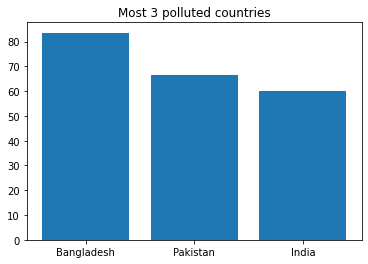

In [9]:
labels = [
    df_sorted_by_average['Country/Region'][0],
    df_sorted_by_average['Country/Region'][2],
    df_sorted_by_average['Country/Region'][4],
]

numbers = [
    df_sorted_by_average['average'][0], 
    df_sorted_by_average['average'][2], 
    df_sorted_by_average['average'][4]
]

plt.figure()
plt.title('Most 3 polluted countries')
plt.bar(labels,numbers)
plt.show()
plt.close()